In [264]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import clonalg
import pandas as pd
from sklearn import preprocessing

In [272]:
df = pd.read_csv('dataset/iris.csv', header=None)

df[4] = pd.Categorical(df[4]).codes

df = df.loc[df[4] == 2]

scaler = preprocessing.MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

labels = train[[4]].copy()
train = train.drop(columns=[4])

In [266]:
# Inputs parameters

population_size = 200
feature_num = len(train.axes[1])
feature_max = train.max()
feature_max  = feature_max.max()
feature_min = train.min()
feature_min  = feature_min.min()


selection_size = 10
random_cells_num = 20
clone_rate = 20
mutation_rate = 0.2
stop_codition = 1000

In [267]:
train = train.to_numpy()

In [268]:
stop = 0
# Population <- CreateRandomCells(Population_size, Problem_size)
population = clonalg.create_random_cells(population_size, feature_num, feature_min, feature_max)
best_affinity_it = []

while stop != stop_codition:
    # Affinity(cell, antigen)
    antigen = train[np.random.randint(0, len(train))]
    population_affinity = [(cell, clonalg.affinity(cell, antigen)) for cell in population]
    populatin_affinity = sorted(population_affinity, key=lambda x: x[1])
    
    best_affinity_it.append(populatin_affinity[:5])
    
    # Populatin_select <- Select(Population, Selection_size)
    population_select = populatin_affinity[:selection_size]
    
    # Population_clones <- clone(p_i, Clone_rate)
    population_clones = []
    for cell in population_select:
        cell_clones = clonalg.clone(cell, clone_rate)
        population_clones += cell_clones
        
    # Hypermutate and affinity
    pop_clones_tmp = []
    for cell in population_clones:
        ind_tmp = clonalg.hypermutate(cell, mutation_rate, feature_min, feature_max, antigen)
        pop_clones_tmp.append(ind_tmp)
    population_clones = pop_clones_tmp
    del pop_clones_tmp
    # Population <- Select(Population, Population_clones, Population_size)
    population = clonalg.select(populatin_affinity, population_clones, population_size)
    # Population_rand <- CreateRandomCells(RandomCells_num)
    population_rand = clonalg.create_random_cells(random_cells_num, feature_num, feature_min, feature_max)
    population_rand_affinity = [(cell, clonalg.affinity(cell, antigen)) for cell in population_rand]
    population_rand_affinity = sorted(population_rand_affinity, key=lambda x: x[1])
    # Replace(Population, Population_rand)
    population = clonalg.replace(population_affinity, population_rand_affinity, population_size)
    population = [cell[0] for cell in population]
    
    stop += 1

In [269]:
# We get the mean of the best 5 individuals returned by iteration of the above loop
bests_mean = []
iterations = [i for i in range(10000)]

for pop_it in best_affinity_it:
    bests_mean.append(np.mean([cell[1] for cell in pop_it]))

In [270]:
pop_it

[(array([0.13502746, 0.0137741 , 0.00684843, 0.00727629]), -1.154119174766214),
 (array([0.01794119, 0.06657224, 0.13267855, 0.00730627]),
  -1.0925472056065355),
 (array([0.02480049, 0.05174729, 0.13547548, 0.02894987]),
  -1.0760723199836963),
 (array([0.14692776, 0.03144797, 0.01727151, 0.08045441]),
  -1.0409438040533843),
 (array([0.03923589, 0.08801754, 0.04653233, 0.119679  ]), -1.02358070429097)]

In [271]:
for i in range(len(pop_it)):
    population[i] = pop_it[i][0]

In [278]:
population = pd.DataFrame(population)
population = pd.concat([population, labels], axis=1, join="inner")
population = pd.DataFrame(scaler.inverse_transform(population), columns=population.columns)

In [279]:
pd.set_option("display.precision", 1)
population

,0,1,2,3,4
0,5.1,2.7,5.0,1.4,2.0
1,4.9,2.3,5.0,1.8,2.0
2,5.2,2.3,4.9,1.7,2.0
3,5.3,2.5,5.0,1.5,2.0
4,5.0,2.5,4.9,1.6,2.0
5,5.1,2.3,4.5,1.9,2.0
6,5.1,3.0,4.5,1.4,2.0
7,4.9,2.7,4.9,1.6,2.0
8,5.8,2.5,4.7,1.4,2.0
9,5.1,2.5,4.9,1.6,2.0


In [274]:
df

,0,1,2,3,4
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


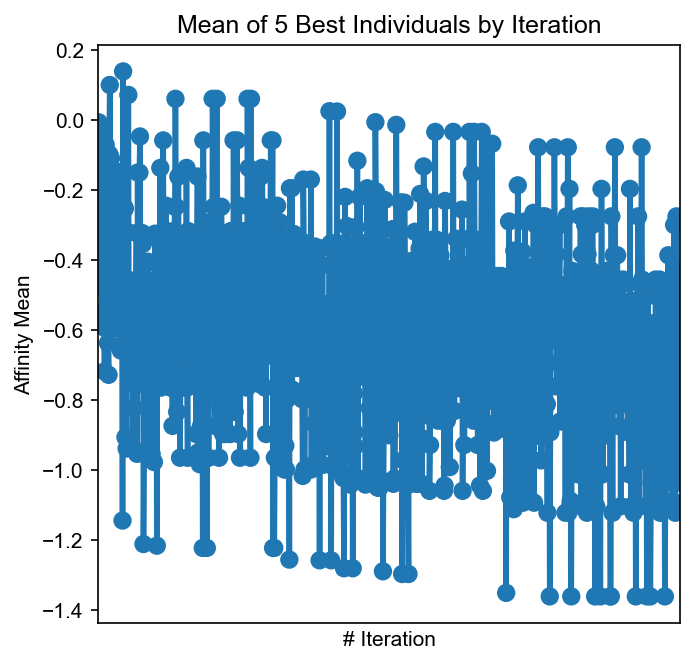

In [8]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize = (5, 5), dpi=150)

sns.set_style("darkgrid")
sns.pointplot(x=iterations, y=bests_mean)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title("Mean of 5 Best Individuals by Iteration", fontsize=12)
plt.ylabel("Affinity Mean", fontsize=10)
plt.rc('ytick',labelsize=2)
plt.xlabel("# Iteration", fontsize=10)
plt.show()